In [3]:
file_path = "/content/dane1.csv"

In [4]:
import pandas as pd
MAIN_DATA = pd.read_csv(file_path)

In [5]:
info = MAIN_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 16 non-null     object 
 1   created_at                  5103 non-null   object 
 2   hashtags                    1578 non-null   object 
 3   media                       801 non-null    object 
 4   urls                        1158 non-null   object 
 5   favorite_count              5103 non-null   int64  
 6   id                          5103 non-null   int64  
 7   in_reply_to_screen_name     1149 non-null   object 
 8   in_reply_to_status_id       1133 non-null   float64
 9   in_reply_to_user_id         1149 non-null   float64
 10  lang                        5103 non-null   object 
 11  place                       69 non-null     object 
 12  possibly_sensitive          1727 non-null   object 
 13  quote_id                    224 n

In [6]:
df = MAIN_DATA.copy()

In [7]:
!python -m spacy download pl_core_news_sm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20.2/20.2 MB 75.1 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import pandas as pd
import spacy

nlp = spacy.load("pl_core_news_sm")
data1 = "/content/dane1.csv"
nlp.max_length = 4000000

with open (data1, "r", encoding = "utf-8") as file:
  text_data1= file.read()
  doc_data1 = nlp(text_data1)

In [ ]:
# Replace abbreviated weekday names with english equivalents (full weekday names) - created_at column


In [9]:
df["created_at"] = df['created_at'] = (
    df['created_at']
    .str.replace('Mon', 'Monday')
    .str.replace('Tue', 'Tuesday')
    .str.replace('Wed', 'Wednesday')
    .str.replace('Thu', 'Thursday')
    .str.replace('Fri', 'Friday')
    .str.replace('Sat', 'Saturday')
    .str.replace('Sun', 'Sunday')
)

In [10]:
print(df['created_at'])

0       Tuesday Jun 01 05:26:49 +0000 2021
1       Tuesday Jun 01 04:15:56 +0000 2021
2       Tuesday Jun 01 04:47:19 +0000 2021
3       Tuesday Jun 01 05:47:47 +0000 2021
4       Tuesday Jun 01 05:03:08 +0000 2021
                       ...                
5098     Friday Jun 04 15:44:32 +0000 2021
5099     Friday Jun 04 15:39:10 +0000 2021
5100     Friday Jun 04 15:41:51 +0000 2021
5101     Friday Jun 04 15:42:02 +0000 2021
5102     Friday Jun 04 15:43:33 +0000 2021
Name: created_at, Length: 5103, dtype: object


In [ ]:
# Replace abbreviated month names with numerical equivalents (e.g. Jun to 06) - user_created_at column

In [11]:
df["user_created_at"].head()

0    Thu Oct 13 11:53:32 +0000 2016
1    Sun May 07 09:55:46 +0000 2017
2    Wed Aug 28 13:39:39 +0000 2013
3    Mon Mar 20 19:25:17 +0000 2017
4    Tue Feb 22 10:12:07 +0000 2011
Name: user_created_at, dtype: object

In [12]:
months = [("Jan", "01"), ("Feb", "02"), ("Mar", "03"), ("Apr", "04"),
          ("May", "05"), ("Jun", "06"), ("Jul", "07"), ("Aug", "08"),
          ("Sep", "09"), ("Oct", "10"), ("Nov", "11"), ("Dec", "12")]

for old, new in months:
    df["user_created_at"] = df["user_created_at"].str.replace(old, new)


In [13]:
df["user_created_at"].head()

0    Thu 10 13 11:53:32 +0000 2016
1    Sun 05 07 09:55:46 +0000 2017
2    Wed 08 28 13:39:39 +0000 2013
3    Mon 03 20 19:25:17 +0000 2017
4    Tue 02 22 10:12:07 +0000 2011
Name: user_created_at, dtype: object

In [ ]:
# Get all links to tweets and pass them to the list

In [14]:
tweet_links = [df["tweet_url"].dropna().tolist()]

In [15]:
tweet_links

[['https://twitter.com/MarkonMarek/status/1399598285082476544',
  'https://twitter.com/21lupus/status/1399580447902994435',
  'https://twitter.com/WTP_Warszawa/status/1399588347358633987',
  'https://twitter.com/m3_ememem/status/1399603562343194625',
  'https://twitter.com/j_wisniewska/status/1399592325324619780',
  'https://twitter.com/Likaifen/status/1399580232156291072',
  'https://twitter.com/serhenryk/status/1399594808545480705',
  'https://twitter.com/bankiet_owa/status/1399593858334347264',
  'https://twitter.com/Warszawa_STAT/status/1399610269467394048',
  'https://twitter.com/twojababkaa/status/1399574621830193157',
  'https://twitter.com/KonradZiembicki/status/1399601711308754944',
  'https://twitter.com/p_danielewski/status/1399591707747000321',
  'https://twitter.com/Aettka/status/1399609540849639426',
  'https://twitter.com/pogodawawa/status/1399591690172784640',
  'https://twitter.com/PawelLech1/status/1399532000218865666',
  'https://twitter.com/TymMarc/status/1399611322

In [16]:
# Get all links found in tweets and pass them to the list (urls column)
inside_tweet_links = df["urls"].dropna().tolist()

In [17]:
inside_tweet_links

['https://ift.tt/3yTNxU8',
 'http://m.in',
 'https://bit.ly/3vFbjBr',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27148510,92-letni-powstaniec-zbieral-na-operacje-oczu-zostal-okradziony.html',
 'https://ift.tt/2eGZx0Z',
 'https://www.facebook.com/skkpolonia/videos/378163756953482',
 'https://ift.tt/3uD9dki',
 'http://drogi.gddkia.gov.pl',
 'http://dlvr.it/S0q2fc',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27157444,warszawskie-puby-przygotowuja-sie-na-euro-2020-na-przeszkodzie.html',
 'https://tvn24.pl/tvnwarszawa/srodmiescie/warszawa-policja-pozyczali-markowe-odkurzacze-i-sprzedawali-w-internecie-za-pol-ceny-5109381',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27097011,ty-cwana-suko-twoja-sielanka-w-koncu-sie-skonczy-od-ponad.html',
 'https://www.gddkia.gov.pl/pl/a/41338/Konkurs-Innowacje-w-drogownictwie',
 'https://twitter.com/LukaszKohut/status/1399474538082144263',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27149691,najdluzszy-tunel-w-polsce-poza-zasiegiem-telefo

In [ ]:
# Get all image links and pass them to the list (media column)

In [18]:
df["media"].head (30)

0     https://twitter.com/MarkonMarek/status/1399598...
1                                                   NaN
2                                                   NaN
3                                                   NaN
4     https://twitter.com/j_wisniewska/status/139959...
5                                                   NaN
6     https://twitter.com/serhenryk/status/139959480...
7                                                   NaN
8     https://twitter.com/Warszawa_STAT/status/13996...
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  NaN
13                                                  NaN
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                                  NaN
18    https://twitter.com/MarkonMarek/status/1399598...
19                                                  NaN
20                                                  NaN
21                                                  NaN
22                                                  NaN
23                                                  NaN
24    https://twitter.com/OnetWiadomosci/status/1399...
25                                                  NaN
26                                                  NaN
27                                                  NaN
28    https://twitter.com/Glodowo/status/13996067911...
29                                                  NaN
Name: media, dtype: object

In [19]:
image_links = df['media'].dropna().tolist()

In [20]:
image_links

['https://twitter.com/MarkonMarek/status/1399598285082476544/photo/1',
 'https://twitter.com/j_wisniewska/status/1399592325324619780/photo/1',
 'https://twitter.com/serhenryk/status/1399594808545480705/photo/1',
 'https://twitter.com/Warszawa_STAT/status/1399610269467394048/photo/1',
 'https://twitter.com/MarkonMarek/status/1399598174130552833/photo/1',
 'https://twitter.com/OnetWiadomosci/status/1399587525220466689/photo/1',
 'https://twitter.com/Glodowo/status/1399606791114219521/photo/1',
 'https://twitter.com/DGWdowodztwo/status/1399593660421865475/photo/1',
 'https://twitter.com/AutoMapa/status/1399607162167513089/photo/1',
 'https://twitter.com/AutoMapa/status/1399592059435196416/photo/1',
 'https://twitter.com/bartjakubik/status/1399580935901827079/photo/1',
 'https://twitter.com/obpowsin/status/1399573466458775555/photo/1',
 'https://twitter.com/MuzeumSportu/status/1399588686614892549/photo/1',
 'https://twitter.com/WTP_Warszawa/status/1399611686429003779/video/1',
 'https://tw

In [ ]:
# Remove all words marked as stopwords and pass the cleaned text to a new column called text_without_stopwords.

In [21]:
df["text"].head(40)

0     @beata_skwarska Warszawa üòÄ https://t.co/W7BcyS...
1     Nieznani sprawcy podpalili kapliczkƒô nadrzewnƒÖ...
2     ‚ö†Ô∏è Utrudnienia w komunikacji: L20 https://t.co...
3     @LukaszKohut @moanrosa @LincaAgata @jan_jozef_...
4     Dzieci to najwiƒôkszy skarb, o kt√≥ry musimy dba...
5     Zbli≈ºa siƒô 81 rocznica I Transportu do KL Ausc...
6     1 czerwca 1895 urodzi≈Ç siƒô Tadeusz Komorowski ...
7     @BIPolska alez to brzydkieüòê. Nijakie. Warszawa...
8     Pomimo malejƒÖcej liczby urodze≈Ñ w Warszawie, l...
9                                     @arayoff warszawa
10    Trzaskowski jest the best CüòÇ miasto Warszawa z...
11    @LemingowOwca @K_Galecka @ZDM_Warszawa @Leming...
12          Ludzie sƒÖ okrutni.\nhttps://t.co/GgNSNbPAfA
13    Pogoda dzi≈õ w #warszawa: Sunny. Temperatura mi...
14    @jarek_osowski @AnnaKalczynska @K_Stanowski Ty...
15    Pomimo malejƒÖcej liczby urodze≈Ñ w Warszawie, l...
16    üöåüèÜü•á Macie ochotƒô powspominaƒá magiczne momenty ...
17    @swiat_kolpakow @Miasto_Lodz Warszawa takim bi...
18            Czerwiec Warszawa https://t.co/4V8oPKrEe8
19    ‚ö†Ô∏è Utrudnienia w komunikacji: R6 https://t.co/...
20    üíª Nowy serwis https://t.co/FP2q1Mp6UI to przed...
21    Tako Warszawa to jo mom richtig we zocy. Harce...
22    @MarcinBHaber @warszawa Uwa≈ºam, ≈ºe pomys≈Ç z pr...
23    @GPietruczuk @RazemDlaBielan @DominikkKuc @Bie...
24    Wi-Fi w warszawskim SKM na razie bƒôdzie dostƒôp...
25    Moje miasto a w nim... "wszystkich nas ≈ÇƒÖczy W...
26    Rada Warszawy podjƒô≈Ça uchwa≈Çƒô krajobrazowƒÖ dot...
27    https://t.co/3TSBVAk63h\nPuby i restauracje ju...
28    Dobrego slodkiego dnia.Festiwal Czekolady Wars...
29    @piotrek77141877 @warszawa Niestety jest do≈õƒá ...
30    Zapraszamy do udzia≈Çu w spacerze oraz warsztat...
31    .@PaulinaPiechna: Warszawa latami czeka≈Ça na t...
32    Prawo trzeba przestrzegaƒá‚ÄºÔ∏èOd tego nie mo≈ºe by...
33    Wys≈Ça≈Çem wniosek do miasta Warszawa o zmianƒô n...
34    Przyznam, ≈ºe trochƒô inaczej zrozumia≈Çem og≈Çosz...
35    Wyobrazi≈Çam sobie, jakby wyglƒÖda≈Ça Warszawa,  ...
36    W Dow√≥dztwie Garnizonu Warszawa #Dzie≈ÑDziecka ...
37    Rada Warszawy podjƒô≈Ça uchwa≈Çƒô krajobrazowƒÖ dot...
38    Rada Warszawy podjƒô≈Ça uchwa≈Çƒô krajobrazowƒÖ dot...
39    Warszawa solidaryzuje siƒô z wolnymi Bia≈Çorusin...
Name: text, dtype: object

In [39]:
for text in df["text"]:
    doc = nlp(text)
    for token in doc:
        print(token.text, token.is_stop)

Streaming output truncated to the last 5000 lines.
. False
30 False
- False
18 False
) False

 False
- False
przy True
kinie False
Silver False
Screen False
, False
ul False
. False
Pu≈Çawska False
( False
17 False
- False
18 False
) False

 False
- False
przy True
K&amp;M False
os False
. False
Zielona False
w True
Weso≈Çej False
, False
przy True
K&amp;M False
w True
St False
. False
Mi≈Çosnej False
i True
na True
Bia≈Ço≈Çƒôce False
skrzy≈ºowanie False
ƒÜmielowskiej False
i True
≈öwiatowida False
( False
17 False
- False
19 False
) False
https://t.co/Wp9mKaMc2 False
T False
@trzaskowski False
_ False
@warszawa False
@M_K_Blonska False
@EDGrupinska False
Mi True
# False
4czerwca False
kojarzy False
siƒô True
tylko True
z True
https://t.co/zWAjSB0CHS False
# False
4czerwca False
, False
w True
rocznicƒô False
pierwszych False
czƒô≈õciowo False
wolnych False
wybor√≥w False
1989 False
r False
. False
, False
w True
≈õwiƒôto False
@warszawa False
ods≈Çonili≈õmy False
pomnik False
‚Äû Fals

In [44]:
df['text_without_stopwords'] = ""
df['text_without_stopwords'] = ""
def no_stopwords(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_stop]

df["text_without_stopwords"] = df["text"].apply(no_stopwords)
print(df["text_without_stopwords"].head(3))

0    [@beata_skwarska, Warszawa, üòÄ, https://t.co/W7...
1    [Nieznani, sprawcy, podpalili, kapliczkƒô, nadr...
2    [‚ö†, Ô∏è, Utrudnienia, komunikacji, :, L20, https...
Name: text_without_stopwords, dtype: object


In [ ]:
# List the top 5 tweets with the highest number of likes

In [22]:
top_likes = df.sort_values(by="favorite_count", ascending=False).head(5)

for tweet in top_likes["text"]:
    print(tweet)

Dzi≈õ z prezydent-elekt @Tsihanouskaya m√≥wili≈õmy o pomocy dla Bia≈Çorusi. Jako samorzƒÖdowcy pomagamy jak mo≈ºemy ‚Äì przekazujemy informacje, wspieramy organizacje bia≈Çoruskie. Pomagamy te≈º Bia≈Çorusinom, kt√≥rych w @warszawa jest najwiecej, np. przyznajƒÖc mieszkania. https://t.co/3lUibemkLj
Warszawa czeka na @Tsihanouskaya. #StandWithBelarus https://t.co/NSCx89TdY7
Jasio, kt√≥ry nie panuje nad swojƒÖ jadaczkƒÖ, znowu przegra≈Ç proces. 
M≈Çody jest. Ciekawe ile siƒô tego nazbiera przez kolejne lata? 
https://t.co/cc0AQFHY1z
Czyli prezydenci opozycji: 
üëâPozna≈Ñ -cieszy siƒô z okresu okupacji Polski  
üëâWarszawa -wprost finansowany z niemieckich fundacji, po co lotnisko w Polsce jak jest w Berlinie 
üëâGda≈Ñsk -II wojna zaczƒô≈Ça siƒô od ‚Äûz≈Çego s≈Çowa Polak√≥w‚Äù 
Analfabeci historyczni i lojalno≈õƒá zewnƒôtrzna https://t.co/pJor6dt2Tn
Pierwszy z 21 nowych pociƒÖg√≥w @SKM_Warszawa ju≈º w docelowych barwach!üôÇ Kolejny etap to monta≈º wyposa≈ºenia oraz dodatkowych element√

In [23]:
top_likes['favorite_count']

4599    1386
4012     744
290      623
1466     605
1841     553
Name: favorite_count, dtype: int64

In [ ]:
# List the top 5 tweets with the highest number of retweets

In [ ]:
# retweet_count descending, then print 5 tweets

In [24]:
top_retweet = df.sort_values(by="retweet_count", ascending=False).head(5)

for tweet in top_retweet["text"]:
    print(tweet)

HALO WARSZAWA
chƒôtnie rozja≈õniƒô, ufarbujƒô, zetnƒô Wam w≈Çosy tanio i dobrze
przez obecnƒÖ sytuacjƒô notorycznie upierdalajƒÖ mi godziny w robocie, a pod koniec roku bƒôdƒô mia≈Ç robiony prywatnie wa≈ºny i kosztowny zabieg, i potrzebujƒô dorobiƒá na boku

proszƒô chocia≈º o RT https://t.co/AqlxWzn9u0
‚ÄºÔ∏è
A teraz pere≈Çka. Fina≈Ç Was rozwali. 
10-10-2019 Warszawa
Leszek jest niepe≈Çnosprawny. Znalaz≈Ç siƒô w parku w pobli≈ºu pl. Pi≈Çsudskiego gdzie akurat odbywa≈Çy siƒô jase≈Çka smole≈Ñskie. Leszek zosta≈Ç zatrzymany przez 5 policjant√≥w. https://t.co/ELmX7gsRAW
UWAGA #Warszawa ≈öniadeckich 12/16

Pani Danuta i Pan Stanis≈Çaw od 25 lat prowadzƒÖ sklep ,,Domal‚Äù. Z biegiem lat ludzie zaczƒôli o nim zapominaƒá. Przez covid dochody znaczƒÖco spad≈Çy. Pani Danuta chƒôtnie ka≈ºdemu doradzi. Koniecznie odwied≈∫cie sklep! https://t.co/RROID305u2
UWAGA #Warszawa ≈öniadeckich 12/16

Pani Danuta i Pan Stanis≈Çaw od 25 lat prowadzƒÖ sklep ,,Domal‚Äù. Z biegiem lat ludzie zaczƒôli o nim zapo

In [25]:
top_retweet['retweet_count']

622     1638
4383     896
1190     865
3904     865
182      865
Name: retweet_count, dtype: int64

In [ ]:
# Show only tweets that are not considered 'sensitive' (possibly_sensitive column).

In [26]:
df["possibly_sensitive"].value_counts()

possibly_sensitive
False    1702
True       25
Name: count, dtype: int64

In [27]:
not_sensitive = df[df["possibly_sensitive"] == False]

for elem in not_sensitive["text"]:
    print(elem)


@beata_skwarska Warszawa üòÄ https://t.co/W7BcySyuNd
‚ö†Ô∏è Utrudnienia w komunikacji: L20 https://t.co/DXAKboKzf5
Dzieci to najwiƒôkszy skarb, o kt√≥ry musimy dbaƒá üë®‚Äçüë©‚Äçüëß‚Äçüë¶üêªüç≠üç¨üç¶ #WspieramyRodziny 
Du≈ºo rado≈õci nie tylko z okazji #Dzie≈ÑDziecka üôÇ Warszawa 2011, na zdjƒôciu https://t.co/S1IoJuhtiL. Franio - dzi≈õ ma 10 lat üôÇ https://t.co/1YYQPTz1le
1 czerwca 1895 urodzi≈Ç siƒô Tadeusz Komorowski - ≈ºo≈Çnierz i polityk, genera≈Ç dywizji, Naczelny W√≥dz Polskich Si≈Ç Zbrojnych, Komendant G≈Ç√≥wny Armii Krajowej, premier rzƒÖdu RP na uchod≈∫stwie. 

,,Gdyby≈õmy zachowali siƒô zupe≈Çnie biernie, Warszawa nie uniknƒô≈Çaby zniszcze≈Ñ i strat.'' https://t.co/HaTE06Qn9b
Pomimo malejƒÖcej liczby urodze≈Ñ w Warszawie, liczba #dzieci wzrasta. Wszystko za sprawƒÖ migracji do atrakcyjnej dla rodzin z dzieƒámi stolicy. https://t.co/NaRixsWTpo
 
Z okazji #Dzie≈ÑDziecka najm≈Çodszym mieszka≈Ñcom #Warszawa i #Mazowsze ≈ºyczymy samych rado≈õci i spe≈Çnienia marze≈Ñ! 

In [ ]:
# Show the tweets of the user who created the account earliest
# (of all users in the dataset) (user_created_at column).

In [28]:
earliest_user = df.sort_values(by="user_created_at", ascending=True).head(1)
earliest_user_id = earliest_user["user_name"].iloc[0]
tweets_earliest_user = df[df["user_name"] == earliest_user_id]

for tweet in tweets_earliest_user["text"]:
    print(tweet)

@JakubFlower @AM_Zukowska @K_Galecka @ZDM_Warszawa Trzeba bƒôdzie stopa ≈Çapaƒá, ≈ºeby podjechaƒá do przej≈õcia


In [ ]:
# Show the tweets of the user with the most followers.

In [29]:
favourite_user = df.sort_values(by="user_followers_count", ascending=True).head(1)
favourite_user_id = favourite_user["user_name"].iloc[0]
tweets_favourite_user = df[df["user_name"] == favourite_user_id]

for tweet in tweets_favourite_user["text"]:
    print(tweet)

Urodzi≈Çe≈õ/-a≈õ siƒô w latach 2004-09 i mieszkasz na #Mazowsze? üßê Mamy dla Ciebie wyzwanie: opowiedz nam o swojej gminie lub mie≈õcie za pomocƒÖ statystycznej infografiki.üìä CzekajƒÖ atrakcyjne nagrody!üèÜ Szczeg√≥≈Çy konkursu: https://t.co/O1HYKKrgek

#NSP2021 #LiczySiƒôKa≈ºdy #Warszawa https://t.co/NioWi0JXNp
Najwiƒôksze wojew√≥dztwo, najwiƒôksze wyzwania, ale te≈º z pewno≈õciƒÖ najwiƒôksza satysfakcja z pracy! Z okazji #Dzie≈ÑSamorzƒÖduTerytorialnego ≈ºyczymy wszystkim Przedstawicielom i Pracownikom samorzƒÖdu terytorialnego #Mazowsze sukces√≥w i zawodowego spe≈Çnienia! ‚û°Ô∏èhttps://t.co/HxUZVaCcMm https://t.co/JoBTco9v9Z
To nie akwizytor ani natrƒôtny telemarketer z call center. Rachmistrz spisowy #NSP2021 dzwoni, aby Ci pom√≥c. Skorzystaj z okazji, ≈ºeby siƒô spisaƒá i poczuƒá satysfakcjƒô z dobrze spe≈Çnionego obowiƒÖzku!üí™ ‚û°Ô∏èhttps://t.co/IdulsSHbHw 

#Mazowsze #Warszawa #LiczySiƒôKa≈ºdy https://t.co/G7nx4MKGZ9
W 2019 r. w≈õr√≥d ≈õwie≈ºo upieczonych Mam z woj. mazow

In [ ]:
# Show only verified users (user_verified column).

In [30]:
for user in df[df["user_verified"] == True]["user_name"]:
    print(user)

Jadwiga Wi≈õniewska
@parents4future@climatejustice.global
Gazeta Wyborcza.pl
Dow√≥dztwo GW
TVN Warszawa
tvn24
Gazeta Wyborcza.pl
PE Biuro w Polsce - konto ZARCHIWIZOWANE
Jagiellonia üíõ‚ù§Ô∏è
TVN Warszawa
Mariusz Trepka
Gazeta Wyborcza.pl
W≈Çodzimierz Bernacki
Jan Mosi≈Ñski
Anna Milczanowska üáµüá±
Prawo i Sprawiedliwo≈õƒá
Anna-Maria ≈ªukowska üíÅüèª‚Äç‚ôÄÔ∏è #Lewica üáµüá±üè≥Ô∏è‚Äçüåàüá∫üá¶
Przemys≈Çaw Czarnek
Gazeta Wyborcza.pl
Krzysztof Kr√≥l
TVN Warszawa
TVN Warszawa
Przemys≈Çaw Czarnek
Przemys≈Çaw Czarnek
TVN Warszawa
PE we Wroc≈Çawiu ‚Äì konto ZARCHIWIZOWANE
tvn24
Gazeta Wyborcza.pl
Robert Biedro≈Ñ
tvp.info üáµüá±
Ministerstwo Rodziny i Polityki Spo≈Çecznej
Witold Tomaszewski
Urszula Pas≈Çawska
Forsal.pl
TVN Warszawa
PrzeglƒÖd Sportowy
TVN Warszawa
TVN Warszawa
TVN Warszawa
Legia.Net
Gazeta Wyborcza.pl
TVN Warszawa
Rzeczpospolita
PLinColombia
Dziennik.pl
Legia Warszawa üëë
Krzysztof Brejza
Prawo i Sprawiedliwo≈õƒá
Anna Milczanowska üáµüá±
Prawo i Sprawiedliwo≈õƒá


In [ ]:
# Indicate on which day of the week the tweets in the dataset
# were most frequently published.

In [31]:

def weekday_count(elem):
  if elem.startswith("Monday"):
    return "Monday"
  elif elem.startswith("Tuesday"):
    return "Tuesday"
  elif elem.startswith("Wednesday"):
    return "Wednesday"
  elif elem.startswith("Thursday"):
    return "Thursday"
  elif elem.startswith("Friday"):
    return "Friday"
  elif elem.startswith("Saturday"):
    return "Saturday"
  elif elem.startswith("Sunday"):
    return "sSunday"

In [32]:
df["publishing_days"] = df["created_at"].apply(weekday_count)
df["publishing_days"]

0       Tuesday
1       Tuesday
2       Tuesday
3       Tuesday
4       Tuesday
         ...   
5098     Friday
5099     Friday
5100     Friday
5101     Friday
5102     Friday
Name: publishing_days, Length: 5103, dtype: object

In [33]:
df["publishing_days"] = df["created_at"].apply(weekday_count)
day_counts = df["publishing_days"].value_counts()
most_frequent = day_counts.idxmax()
print (most_frequent)

Wednesday


In [34]:
# Extract people (persName) and add them to a column called persons
df['persons'] = ""
def extract_persons(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "persName"]

df["persons"] = df["text"].apply(extract_persons)
print(df["persons"])

0                                    []
1                                    []
2                                    []
3                                    []
4                                    []
                     ...               
5098                                 []
5099           [Warszawa - ≈ör√≥dmie≈õcie]
5100                             [Kasi]
5101                                 []
5102    [https://t.co/3TSBVAk63h\nPuby]
Name: persons, Length: 5103, dtype: object


In [35]:
# Extract organisations (orgName) and place them in the column called organisations
df['organisations'] = ""
def extract_org(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "orgName"]

df["organisations"] = df["text"].apply(extract_org)
print(df["organisations"])

0                                                      []
1                                                      []
2                                           [Utrudnienia]
3                                                      []
4                               [https://t.co/S1IoJuhtiL]
                              ...                        
5098                                                   []
5099    [@Jan11131258 @pikus_pol @dziennikarz @Prawo_d...
5100                                            [KOCHANI]
5101                                                [ONR]
5102                                                   []
Name: organisations, Length: 5103, dtype: object


In [ ]:
### matplotlib

In [36]:
import matplotlib.pyplot as plt

In [ ]:
#  create a graph showing the number of tweets per day of the week

# "publishing days" per nr of tweets

Text(0.5, 1.0, 'Number of Tweets per Day of the Week')

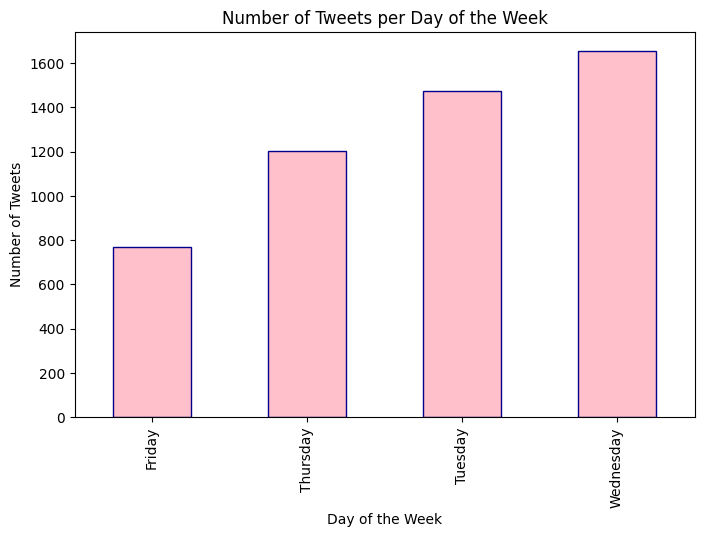

In [37]:
tweets_per_day = df["publishing_days"].value_counts()
plt.figure(figsize=(8, 5))
tweets_per_day.sort_index().plot(kind="bar", color="pink", edgecolor="darkblue")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets per Day of the Week")

In [45]:
df.to_csv("Olga_Gasowska_dane1.csv", index=False)